In [2]:
import pandas as pd

# Replace the filename with whatever Colab shows after upload!
df = pd.read_csv('/content/data (1).csv')

df.head()



,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

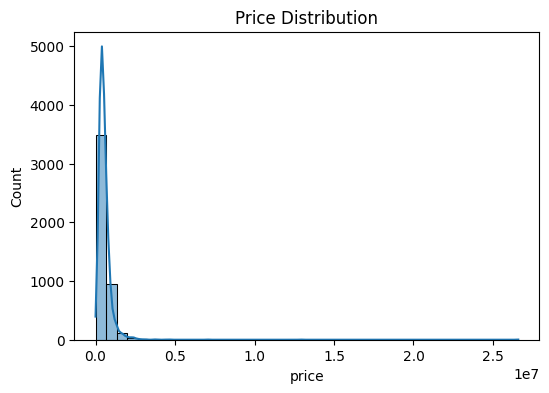

In [3]:
# Basic structure of the dataset
df.info()

# Check missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Quick statistical summary
print("\nSummary statistics:")
print(df.describe())

# Price distribution plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.histplot(df['price'], kde=True, bins=40)
plt.title("Price Distribution")
plt.show()


In [4]:
import numpy as np

# Make a copy to avoid modifying original
df_clean = df.copy()

# -------------------------------
# 1) Convert date column (extract year & month)
# -------------------------------
df_clean['date'] = pd.to_datetime(df_clean['date'], errors='coerce')
df_clean['year'] = df_clean['date'].dt.year
df_clean['month'] = df_clean['date'].dt.month

# -------------------------------
# 2) Handle Missing Values
# -------------------------------
num_cols = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','view','condition','waterfront']

# Fill numeric missing values with median
for col in num_cols:
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())

# Fill year/month if any NaN
df_clean['year'] = df_clean['year'].fillna(df_clean['year'].median())
df_clean['month'] = df_clean['month'].fillna(df_clean['month'].median())

# -------------------------------
# 3) Create Log Price (Improves Model Performance)
# -------------------------------
df_clean['price_log'] = np.log1p(df_clean['price'])

# -------------------------------
# 4) Derived Feature: price_per_sqft
# -------------------------------
df_clean['price_per_sqft'] = df_clean['price'] / df_clean['sqft_living'].replace(0, np.nan)
df_clean['price_per_sqft'] = df_clean['price_per_sqft'].fillna(df_clean['price_per_sqft'].median())

print("Data cleaned and new features created!")
df_clean.head()


Data cleaned and new features created!


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,street,city,statezip,country,year,month,price_log,price_per_sqft
0,2014-05-02,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,...,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,2014,5,12.653962,233.582090
1,2014-05-02,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,...,1921,0,709 W Blaine St,Seattle,WA 98119,USA,2014,5,14.684291,653.150685
2,2014-05-02,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,...,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,2014,5,12.742569,177.202073
3,2014-05-02,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,...,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,2014,5,12.948012,210.000000
4,2014-05-02,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,...,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,2014,5,13.217675,283.505155


In [5]:
# -------------------------------
# 1) Select the features we will use
# -------------------------------
feature_cols = [
    'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
    'waterfront', 'view', 'condition',
    'year', 'month',
    'price_per_sqft'
]

# Make sure only existing columns are selected
feature_cols = [c for c in feature_cols if c in df_clean.columns]

X_raw = df_clean[feature_cols].copy()
y = df_clean['price_log']   # Log-transformed target

# -------------------------------
# 2) Convert some numeric-like columns to categorical (string)
# -------------------------------
cat_cols = ['waterfront', 'view', 'condition']

for c in cat_cols:
    if c in X_raw.columns:
        X_raw[c] = X_raw[c].astype(str)

# -------------------------------
# 3) One-hot encode categorical columns (simple method)
# -------------------------------
X = pd.get_dummies(X_raw, columns=cat_cols, drop_first=True)

print("Final feature matrix shape:", X.shape)
X.head()


Final feature matrix shape: (4600, 17)


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,year,month,price_per_sqft,waterfront_1,view_1,view_2,view_3,view_4,condition_2,condition_3,condition_4,condition_5
0,3.0,1.50,1340,7912,1.5,2014,5,233.582090,False,False,False,False,False,False,True,False,False
1,5.0,2.50,3650,9050,2.0,2014,5,653.150685,False,False,False,False,True,False,False,False,True
2,3.0,2.00,1930,11947,1.0,2014,5,177.202073,False,False,False,False,False,False,False,True,False
3,3.0,2.25,2000,8030,1.0,2014,5,210.000000,False,False,False,False,False,False,False,True,False
4,4.0,2.50,1940,10500,1.0,2014,5,283.505155,False,False,False,False,False,False,False,True,False


In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Compute MSE manually
mse = mean_squared_error(true_price, pred_price)
rmse = np.sqrt(mse)  # <-- manual RMSE

mae = mean_absolute_error(true_price, pred_price)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")


RMSE: 930662.48
MAE: 50169.15


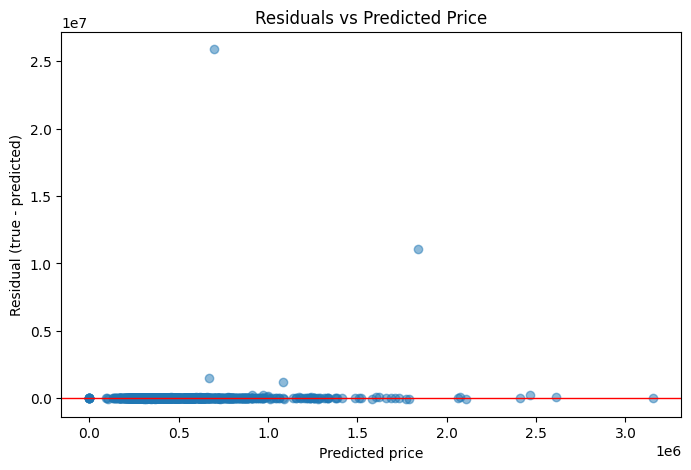

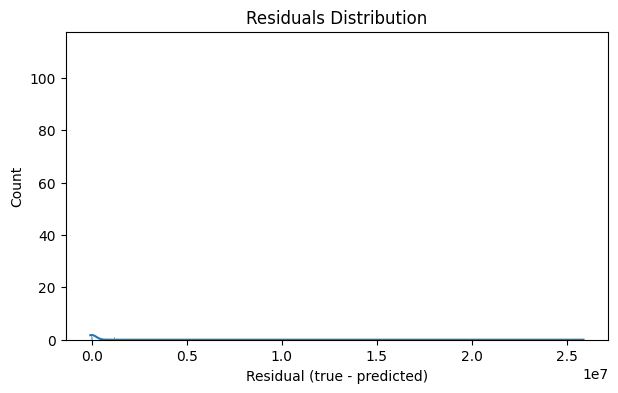

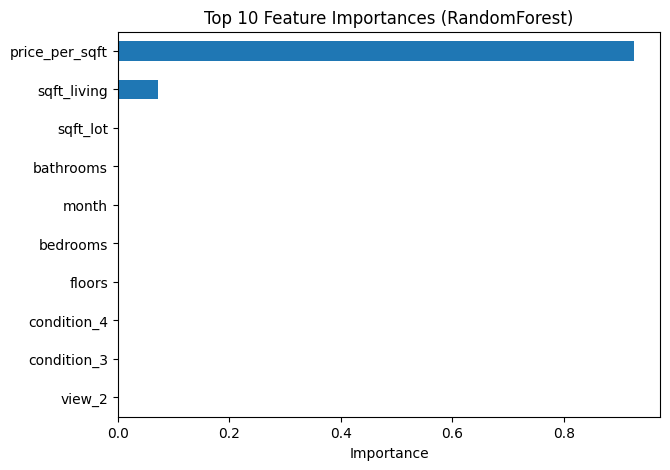


Top features:
 price_per_sqft    0.926673
sqft_living       0.072908
sqft_lot          0.000146
bathrooms         0.000096
month             0.000037
bedrooms          0.000036
floors            0.000026
condition_4       0.000017
condition_3       0.000015
view_2            0.000011
dtype: float64


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# --- Safety: ensure variables exist ---
try:
    model, X_test, y_test, pred_price
except NameError:
    raise RuntimeError("Make sure you ran the training cell and have `model`, `X_test`, `y_test`, and `pred_price` in the notebook.")

# Recompute predicted log and true prices in case names differ
pred_log = model.predict(X_test)
pred_price = np.expm1(pred_log)
true_price = np.expm1(y_test)

# Residuals
residuals = true_price - pred_price

# 1) Residuals vs Predicted
plt.figure(figsize=(8,5))
plt.scatter(pred_price, residuals, alpha=0.5)
plt.axhline(0, color='red', linewidth=1)
plt.xlabel('Predicted price')
plt.ylabel('Residual (true - predicted)')
plt.title('Residuals vs Predicted Price')
plt.show()

# 2) Residual distribution
plt.figure(figsize=(7,4))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residual (true - predicted)')
plt.show()

# 3) Top feature importances
# model.feature_importances_ works for RandomForest; ensure columns align
if hasattr(model, 'feature_importances_'):
    fi = pd.Series(model.feature_importances_, index=X_test.columns).sort_values(ascending=False).head(10)
    plt.figure(figsize=(7,5))
    fi.plot(kind='barh')
    plt.gca().invert_yaxis()
    plt.title('Top 10 Feature Importances (RandomForest)')
    plt.xlabel('Importance')
    plt.show()
    print("\nTop features:\n", fi)
else:
    print("Model has no attribute 'feature_importances_'.")


In [10]:
import joblib, json, os
save_dir = '/content/drive/MyDrive/house-price-project' if os.path.isdir('/content/drive') else '/content'
os.makedirs(save_dir, exist_ok=True)

# Save model
model_path = os.path.join(save_dir, 'house_price_model.pkl')
joblib.dump(model, model_path)

# Save feature names (columns used by model)
feat_path = os.path.join(save_dir, 'feature_names.json')
with open(feat_path, 'w') as f:
    json.dump(X_test.columns.tolist(), f)

print("Saved model ->", model_path)
print("Saved feature list ->", feat_path)

# QUICK predict example (use realistic sample values)
sample_raw = {
    'bedrooms': 3,
    'bathrooms': 2,
    'sqft_living': 1400,
    'sqft_lot': 5000,
    'floors': 1,
    'price_per_sqft': 1200,
    'year': int(df_clean['year'].median()),
    'month': int(df_clean['month'].median()),
    # categorical one-hot columns were created; set them later
}

# Build a sample DataFrame respecting one-hot columns
sample_df = pd.DataFrame([sample_raw])

# If you had categorical columns (waterfront/view/condition) that were one-hot-encoded,
# create their dummy columns with 0 and then ensure ordering:
for col in X_test.columns:
    if col not in sample_df.columns:
        sample_df[col] = 0

# Reorder to model's expected columns
sample_df = sample_df[X_test.columns]

# Predict (model expects log price)
pred_log_sample = model.predict(sample_df)
pred_price_sample = np.expm1(pred_log_sample)[0]
print("Predicted price for sample:", round(pred_price_sample, 2))


Saved model -> /content/house_price_model.pkl
Saved feature list -> /content/feature_names.json
Predicted price for sample: 1098362.93


In [11]:
def predict_price(bedrooms, bathrooms, sqft_living, sqft_lot, floors,
                  price_per_sqft, year, month):

    # Build input row using the model's feature columns
    sample = {col: 0 for col in X_test.columns}

    # Fill numeric values
    sample.update({
        'bedrooms': bedrooms,
        'bathrooms': bathrooms,
        'sqft_living': sqft_living,
        'sqft_lot': sqft_lot,
        'floors': floors,
        'price_per_sqft': price_per_sqft,
        'year': year,
        'month': month
    })

    # Convert to DataFrame
    sample_df = pd.DataFrame([sample], columns=X_test.columns)

    # Predict log price → convert back
    pred_log = model.predict(sample_df)[0]
    return np.expm1(pred_log)

# Example prediction
predict_price(3, 2, 1500, 5000, 1, 1200, 2014, 7)


np.float64(1326501.3492025258)

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=150, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

results = []

for name, m in models.items():
    m.fit(X_train, y_train)

    pred_log = m.predict(X_test)
    pred_price = np.expm1(pred_log)
    mse = mean_squared_error(true_price, pred_price)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(true_price, pred_price)

    results.append([name, rmse, mae])

# Convert to table
results_df = pd.DataFrame(results, columns=["Model", "RMSE", "MAE"])
print(results_df)


               Model          RMSE           MAE
0  Linear Regression  1.118255e+66  3.686778e+64
1      Random Forest  9.306625e+05  5.016915e+04
2  Gradient Boosting  9.024487e+05  5.756953e+04
